In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data, test_data = tfds.load("mnist",
                                  split=['train', 'test'],
                                  as_supervised=True)

In [ ]:
def helper(ds):
  x, y = [], []
  for x_, y_ in tfds.as_numpy(ds):
    x.append(x_)
    y.append(y_)
  return np.asarray(x) / 255.0, np.asarray(y)

train_images, train_labels = helper(train_data)
test_images, test_labels = helper(test_data)

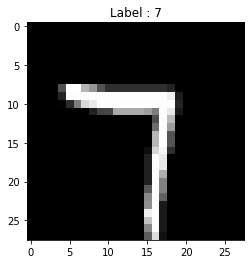

In [ ]:
i = np.random.choice(list(range(0, 1800)))
plt.imshow(train_images[i][:, :, -1], cmap= 'gray')
plt.title("Label : " + str(train_labels[i]))
plt.savefig("sample.svg")
plt.show()

In [ ]:
mod = tf.keras.Sequential()
mod.add(tf.keras.Input(shape=(28,28, 1)))
mod.add(tf.keras.layers.Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'))
mod.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
mod.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
mod.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
mod.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
mod.add(tf.keras.layers.Flatten())
mod.add(tf.keras.layers.Dense(128, activation='relu'))
mod.add(tf.keras.layers.Dropout(0.2))
mod.add(tf.keras.layers.Dense(10, activation="softmax"))
mod.summary()
mod.compile(optimizer= tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = mod.fit(train_images, train_labels, epochs=10)
mod.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 1568)              0

[0.031103162094950676, 0.9914000034332275]

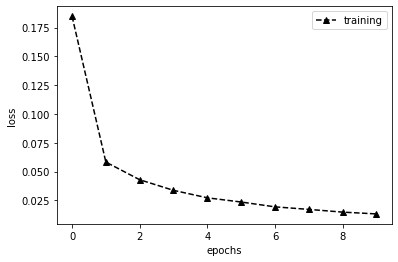

In [ ]:
plt.plot(history.history['loss'], label="training", ls="--", marker = "^", color = "black")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.savefig("graph.svg")